In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train_full,y_train_full),(x_test,y_test) = mnist.load_data()

In [4]:
x_train_full.shape

(60000, 28, 28)

In [5]:
x_valid,x_train = x_train_full[:5000]/255,x_train_full[5000:]/255
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
x_test = x_test/255

<AxesSubplot:>

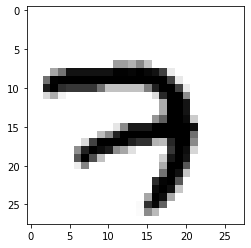

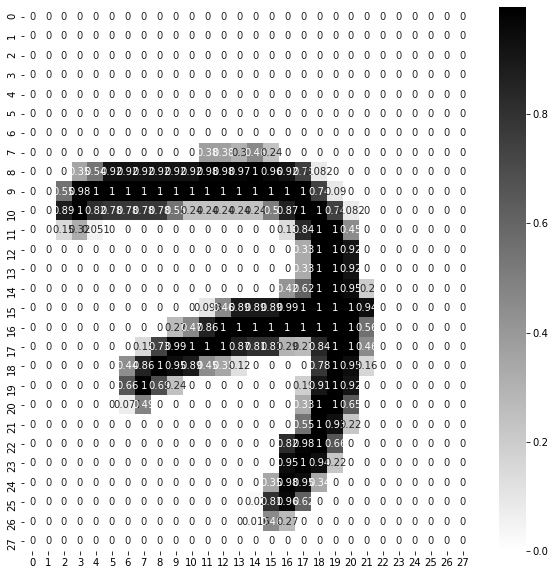

In [6]:
plt.imshow(x_train[0],cmap='binary')
plt.figure(figsize=(10,10))
sns.heatmap(x_train[0],cmap='binary',annot = True)

In [7]:
LAYERS = [tf.keras.layers.Flatten(input_shape= [28,28]),
          tf.keras.layers.Dense(units = 300,activation='relu'),
          tf.keras.layers.Dense(units = 100,activation='relu'),
          tf.keras.layers.Dense(units = 10,activation='softmax')]
model_clf = tf.keras.models.Sequential(LAYERS)

In [8]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_clf.layers

In [10]:
LOSS = tf.losses.sparse_categorical_crossentropy
OPT = tf.keras.optimizers.SGD()
MET = ['accuracy']

In [11]:
model_clf.compile(loss=LOSS,
              optimizer=OPT,
              metrics=MET)

In [12]:
validation_set = (x_valid,y_valid)
history = model_clf.fit(x_train,y_train,epochs = 30
                        ,validation_data=validation_set)

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5875 - accuracy: 0.8489 - val_loss: 0.3010 - val_accuracy: 0.9176
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2862 - accuracy: 0.9175 - val_loss: 0.2450 - val_accuracy: 0.9294
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2346 - accuracy: 0.9326 - val_loss: 0.2030 - val_accuracy: 0.9464accuracy - ETA: 0s - loss: 0.238
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1998 - accuracy: 0.9432 - val_loss: 0.1779 - val_accuracy: 0.9546
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1739 - accuracy: 0.9509 - val_loss: 0.1606 - val_accuracy: 0.9554
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1541 - accuracy: 0.9558 - val_loss: 0.1441 - val_accuracy: 0.9616
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1377 - accuracy: 0.9610 - 

In [13]:
model_clf.evaluate(x_test,y_test)

313/313 [==============================] - 0s 976us/step - loss: 0.0700 - accuracy: 0.9781


[0.07004844397306442, 0.9781000018119812]

In [14]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.587471,0.848855,0.301016,0.9176
1,0.286152,0.917509,0.245033,0.9294
2,0.234560,0.932618,0.202992,0.9464
3,0.199831,0.943218,0.177901,0.9546
4,0.173893,0.950855,0.160573,0.9554
5,0.154096,0.955800,0.144128,0.9616
6,0.137686,0.961000,0.134030,0.9648
7,0.124382,0.964545,0.123165,0.9672
8,0.112742,0.968055,0.115441,0.9692
9,0.103731,0.970836,0.109558,0.9678


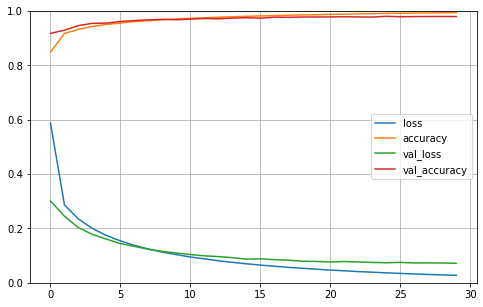

In [19]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
y_pred =  model_clf.predict(x_test)
y_pred[0].round()

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [29]:
y_test[0]

7